In [ ]:
#ΒΙΒΛΙΟΘΗΚΕΣ
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#ΚΑΤΕΒΑΣΜΑ ΤΩΝ ΦΟΤΟΓΡΑΦΙΩΝ ΤΩΝ ΛΟΥΛΟΥΔΙΩΝ
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
#ΑΡΙΘΜΟΣ ΕΙΚΟΝΩΝ
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


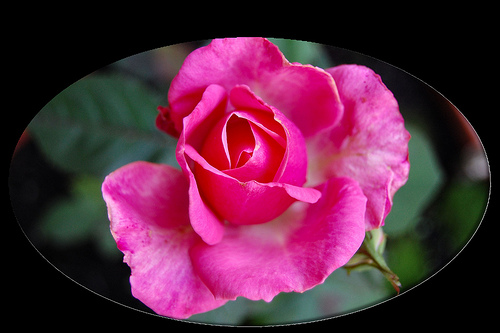

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

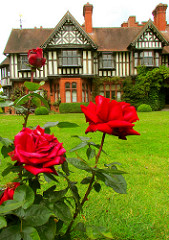

In [ ]:
PIL.Image.open(str(roses[1]))

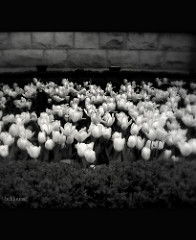

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

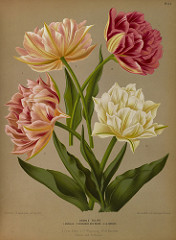

In [ ]:
PIL.Image.open(str(tulips[1]))

In [ ]:
#ΔΗΜΙΟΥΡΓΕΊΑ DATA SETS
#ΟΡΙΣΜΟΣ ΠΑΡΑΜΈΤΡΩΝ
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#ΔΙΑΧΩΡΙΣΜΟΣ ΕΙΚΟΝΩΝ ΚΑΤΑ ΤΗΝ ΑΝΑΠΤΥΞΗ ΤΟΥ ΜΕΝΤΕΛΟΥ. ΧΡΗΣΙΜΟΠΟΙΟΥΜΕ ΤΟ 80% ΤΩΝ ΕΙΚΟΝΩΝ ΓΙΑ ΕΣΚΠΑΙΔΕΥΣΗ ΚΑΙ ΤΟ 20% ΓΙΑ ΕΠΙΚΥΡΩΣΗ.
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


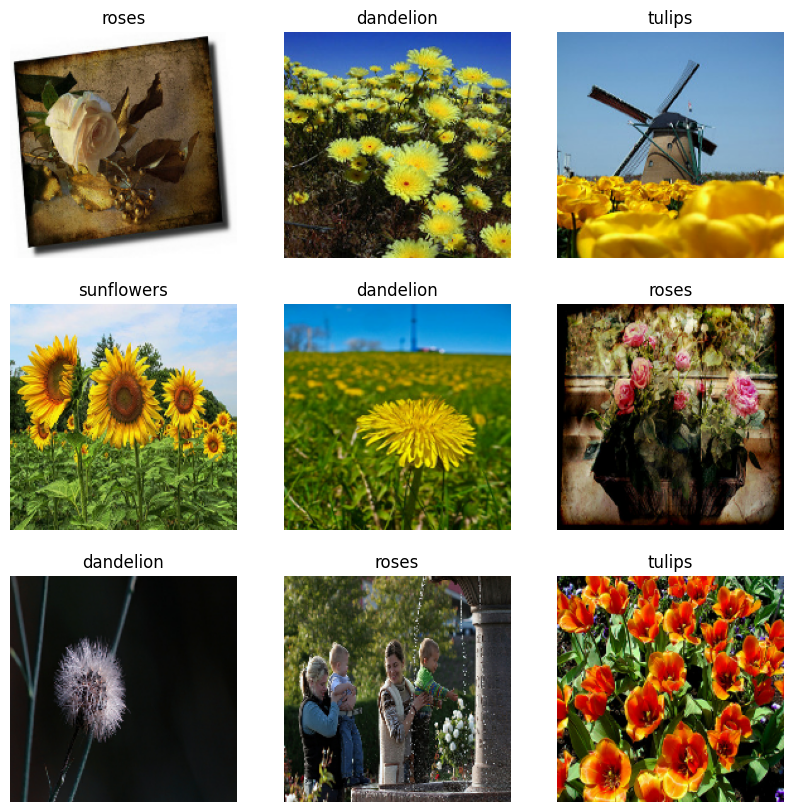

In [ ]:
#ΕΔΩ ΕΜΦΑΝΙΖΟΝΤΑΙ ΟΙ ΠΡΩΤΕς 9 ΕΙΚΟΝΕΣ ΤΟΥ DATA SETS
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
#ΔΙΑΜΟΡΦΩΣΗ ΣΥΝΟΛΟΥ ΔΕΔΟΜΕΝΩΝ ΓΙΑ ΑΠΟΔΟΣΗ
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 16s 38ms/step - loss: 1.3331 - accuracy: 0.4196 - val_loss: 1.0399 - val_accuracy: 0.6144
Epoch 2/10
92/92 [==============================] - 3s 29ms/step - loss: 0.9613 - accuracy: 0.6410 - val_loss: 0.9801 - val_accuracy: 0.6158
Epoch 3/10
92/92 [==============================] - 2s 20ms/step - loss: 0.7461 - accuracy: 0.7217 - val_loss: 1.0454 - val_accuracy: 0.6185
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.5251 - accuracy: 0.8154 - val_loss: 0.9227 - val_accuracy: 0.6717
Epoch 5/10
92/92 [==============================] - 2s 20ms/step - loss: 0.2905 - accuracy: 0.9077 - val_loss: 1.0774 - val_accuracy: 0.6594
Epoch 6/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1719 - accuracy: 0.9479 - val_loss: 1.3489 - val_accuracy: 0.6417
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.0911 - accuracy: 0.9748 - val_loss: 1.6105 - val_accuracy: 0.6444
Epoch 8/10
9

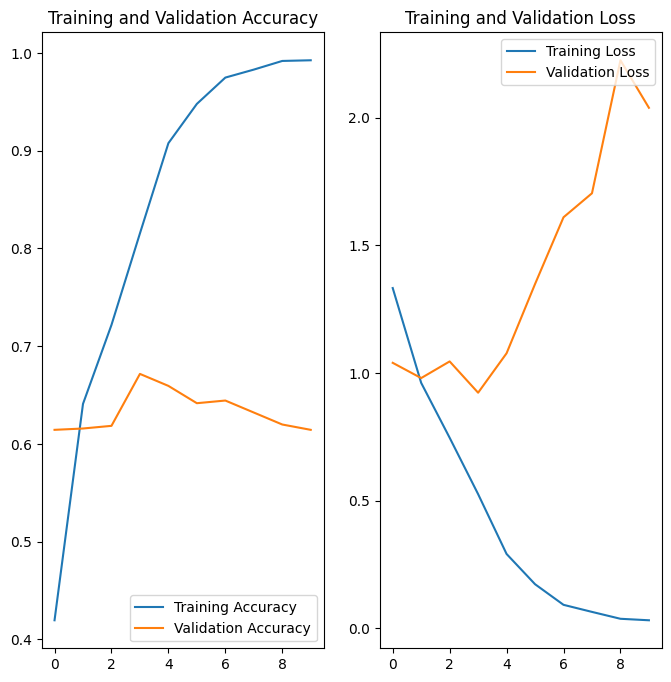

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#ΑΥΞΗΣΗ ΔΕΔΟΜΕΝΩΝ
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

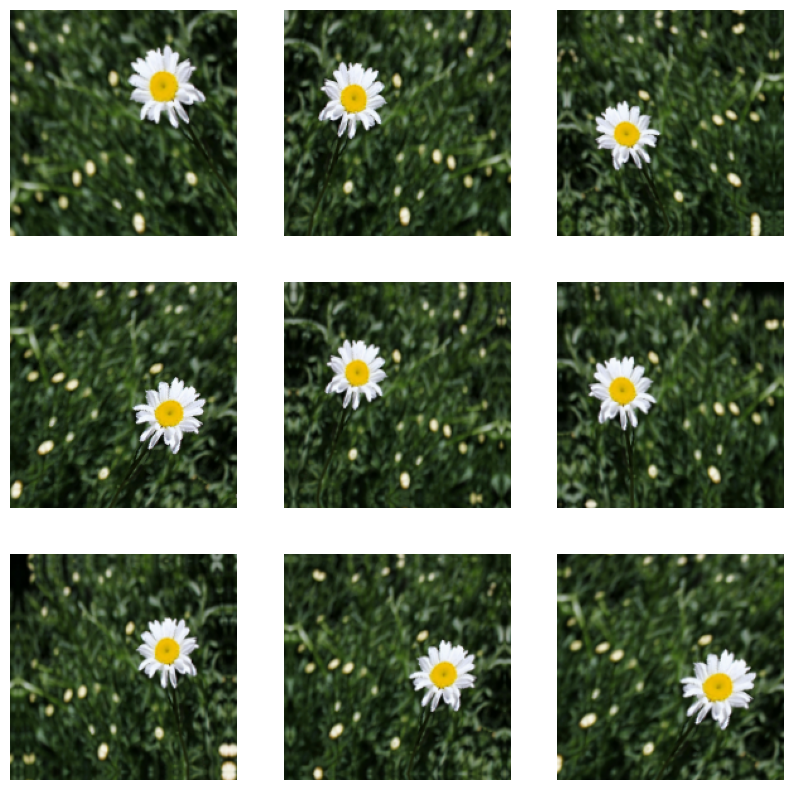

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 6s 31ms/step - loss: 1.2692 - accuracy: 0.4540 - val_loss: 1.1815 - val_accuracy: 0.5177
Epoch 2/20
92/92 [==============================] - 3s 28ms/step - loss: 1.0218 - accuracy: 0.5960 - val_loss: 0.9650 - val_accuracy: 0.6144
Epoch 3/20
92/92 [==============================] - 3s 31ms/step - loss: 0.9092 - accuracy: 0.6420 - val_loss: 0.9686 - val_accuracy: 0.6390
Epoch 4/20
92/92 [==============================] - 3s 29ms/step - loss: 0.8552 - accuracy: 0.6706 - val_loss: 0.8827 - val_accuracy: 0.6499
Epoch 5/20
92/92 [==============================] - 3s 28ms/step - loss: 0.8171 - accuracy: 0.6795 - val_loss: 0.8267 - val_accuracy: 0.6730
Epoch 6/20
92/92 [==============================] - 3s 30ms/step - loss: 0.7735 - accuracy: 0.7033 - val_loss: 0.8053 - val_accuracy: 0.6839
Epoch 7/20
92/92 [==============================] - 3s 31ms/step - loss: 0.7279 - accuracy: 0.7251 - val_loss: 0.7345 - val_accuracy: 0.7330
Epoch 8/20
92

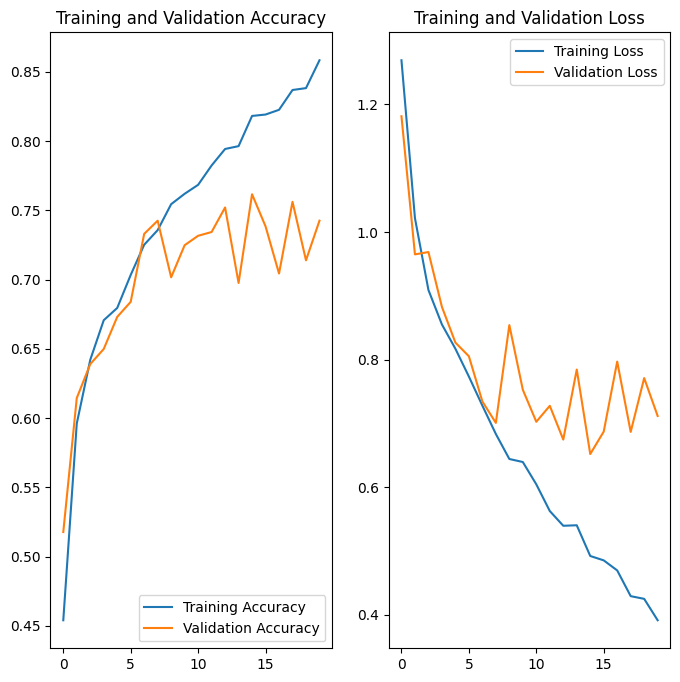

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#ΠΡΟΒΛΕΨΗ ΜΕ ΝΕΑ ΔΕΔΟΜΕΝΑ ΠΟΥ ΔΕΝ ΑΝΟΙΚΟΥΝ ΣΤΟ DATA SETS
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 328ms/step
This image most likely belongs to sunflowers with a 99.48 percent confidence.
